# Featurization and Model Tuning Project 

Context:         
    
       Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate

Objective:  
    
    Modeling of strength of high performance concrete using Machine Learning 

# 1. Deliverable -1 (Exploratory data quality report reflecting the following) (20 marks)

# 1a. Univariate analysis (5 marks) 

i. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import percentile
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
from sklearn.impute import SimpleImputer
from scipy.stats import iqr
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, cross_val_score
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from time import time
from scipy.stats import randint as sp_randint
from sklearn.datasets import load_digits

In [2]:
#loading data
df=pd.read_csv('concrete.csv')

In [3]:
df.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
shape=df.shape  #Provides the Shape in (Rows, Columns) in the Data Frame df
print('shape of the data frame is =',shape)

shape of the data frame is = (1030, 9)


In [5]:
#Column names
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

Attribute Information: 

    Cement    : measured in kg in a m3 mixture  
    Blast     : measured in kg in a m3 mixture  
    Fly ash    : measured in kg in a m3 mixture 
    Water     : measured in kg in a m3 mixture  
    Superplasticizer   : measured in kg in a m3 mixture  
    Coarse Aggregate   : measured in kg in a m3 mixture  
    Fine Aggregate   : measured in kg in a m3 mixture  
    Age     : day (1~365)  
    Concrete compressive strength measured in MPa

In [6]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
i = 0
#Length of the coulmns of the data fram
n=len(df.columns)
#List of all the attribues in the data frame 
List=list(df.columns.values)
print('Data type of each attribute of Data frame:\n')
while i < n:     
    New_List=List[i]
    Data_type=df[New_List].dtype
    print('Data Type of',New_List,'attribute is:',Data_type)
    i=i+1

Data type of each attribute of Data frame:

Data Type of cement attribute is: float64
Data Type of slag attribute is: float64
Data Type of ash attribute is: float64
Data Type of water attribute is: float64
Data Type of superplastic attribute is: float64
Data Type of coarseagg attribute is: float64
Data Type of fineagg attribute is: float64
Data Type of age attribute is: int64
Data Type of strength attribute is: float64


In [8]:
print('Checking the presence of missing values in the Data frame:\n')
null_value_count = df.isnull().sum() 

i = 0

#Length of the coulmns of the data fram
n=len(df.columns)

#List of all the attribues in the data frame 
List=list(df.columns.values)

while i < n:   
    New_List=List[i]
    print('There are',null_value_count[i],'null values in',New_List,'attribute in the dataframe')

    i=i+1

Checking the presence of missing values in the Data frame:

There are 0 null values in cement attribute in the dataframe
There are 0 null values in slag attribute in the dataframe
There are 0 null values in ash attribute in the dataframe
There are 0 null values in water attribute in the dataframe
There are 0 null values in superplastic attribute in the dataframe
There are 0 null values in coarseagg attribute in the dataframe
There are 0 null values in fineagg attribute in the dataframe
There are 0 null values in age attribute in the dataframe
There are 0 null values in strength attribute in the dataframe


Insights:
    
    There are no null values in any of the attribute in the dataframe df

In [9]:
#Stats of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [10]:
# 5 point summary of numerical attributes
i = 0

# New dataframe which only contains the numeric attribues
new_df=df._get_numeric_data()

#Length of the coulmns of the new data frame which only contains the numeric attributes
n=len(new_df.columns)

#List of all the attribues in the new data frame 
List=list(new_df.columns.values)

print('5 point summary of numerical attributes:\n')

while i < n:   
    
    New_List=List[i]

    #calculate the quartiles at Percentile '0' for min value, '25' for Q1, '50' for median, '75' for Q3, and '100' for Max
    quartiles = percentile(df[New_List], [0,25, 50, 75,100])
    
    # print the 5 point summary of numerical attributes
    print(New_List,'attribute:')
    print('Min of',New_List,'is: %.3f' % quartiles[0])
    print('Q1 of',New_List,'is: %.3f' % quartiles[1])
    print('Median of',New_List,'is: %.3f' % quartiles[2])
    print('Q3 of',New_List,'is: %.3f' % quartiles[3])
    print('Max of',New_List,'is: %.3f' % quartiles[4])
    print('Standard Deviation of',New_List,'is: %.3f' %df[New_List].std(),'\n')
    i=i+1

5 point summary of numerical attributes:

cement attribute:
Min of cement is: 102.000
Q1 of cement is: 192.375
Median of cement is: 272.900
Q3 of cement is: 350.000
Max of cement is: 540.000
Standard Deviation of cement is: 104.506 

slag attribute:
Min of slag is: 0.000
Q1 of slag is: 0.000
Median of slag is: 22.000
Q3 of slag is: 142.950
Max of slag is: 359.400
Standard Deviation of slag is: 86.279 

ash attribute:
Min of ash is: 0.000
Q1 of ash is: 0.000
Median of ash is: 0.000
Q3 of ash is: 118.300
Max of ash is: 200.100
Standard Deviation of ash is: 63.997 

water attribute:
Min of water is: 121.800
Q1 of water is: 164.900
Median of water is: 185.000
Q3 of water is: 192.000
Max of water is: 247.000
Standard Deviation of water is: 21.354 

superplastic attribute:
Min of superplastic is: 0.000
Q1 of superplastic is: 0.000
Median of superplastic is: 6.400
Q3 of superplastic is: 10.200
Max of superplastic is: 32.200
Standard Deviation of superplastic is: 5.974 

coarseagg attribute:
M

In [11]:
print('Measure of skewness of Quantitative Data in the Dataframe df:\n')
i = 0
List=list(df.columns.values)
n=len(List)
while i < n:   
    New_List=List[i]
    skew=df[New_List].skew(axis = 0, skipna = True)
    if (skew==0):
        conclusion='Data is normally distributed or Symmetric'
    elif(skew<0):
        conclusion='Data is Left-Skewed'
    else:
        conclusion='Data is Right-Skewed'     
    print('Skewness of',New_List,'is: %.3f'%skew,'and',conclusion)
    i=i+1

Measure of skewness of Quantitative Data in the Dataframe df:

Skewness of cement is: 0.509 and Data is Right-Skewed
Skewness of slag is: 0.801 and Data is Right-Skewed
Skewness of ash is: 0.537 and Data is Right-Skewed
Skewness of water is: 0.075 and Data is Right-Skewed
Skewness of superplastic is: 0.907 and Data is Right-Skewed
Skewness of coarseagg is: -0.040 and Data is Left-Skewed
Skewness of fineagg is: -0.253 and Data is Left-Skewed
Skewness of age is: 3.269 and Data is Right-Skewed
Skewness of strength is: 0.417 and Data is Right-Skewed


In [12]:
print('Checking the presence of outliers of Quantitative Data in the Dataframe df:\n')
i = 0
total_outliers=0
List=list(df.columns.values)
n=len(List)
while i < n:   
    New_List=List[i]
    minimum,q1,q3,maximum= np.percentile(df[New_List],[0,25,75,100])
    iqr=q3-q1
    lower_value=q1-(1.5 * iqr)
    upper_value=q3+(1.5 * iqr)
    if ((minimum<lower_value) or (maximum>upper_value)):
        outliers = [x for x in df[New_List] if x < lower_value or x > upper_value]
        print('Identified outliers for',New_List,'out of', len(df[New_List]),'records: %d' % len(outliers))       
        total_outliers=total_outliers+len(outliers)
    else:
        print('There is no outlier for the attribute',New_List)        
    i=i+1
print('Total number of outliers are:',total_outliers)

Checking the presence of outliers of Quantitative Data in the Dataframe df:

There is no outlier for the attribute cement
Identified outliers for slag out of 1030 records: 2
There is no outlier for the attribute ash
Identified outliers for water out of 1030 records: 9
Identified outliers for superplastic out of 1030 records: 10
There is no outlier for the attribute coarseagg
Identified outliers for fineagg out of 1030 records: 5
Identified outliers for age out of 1030 records: 59
Identified outliers for strength out of 1030 records: 4
Total number of outliers are: 89


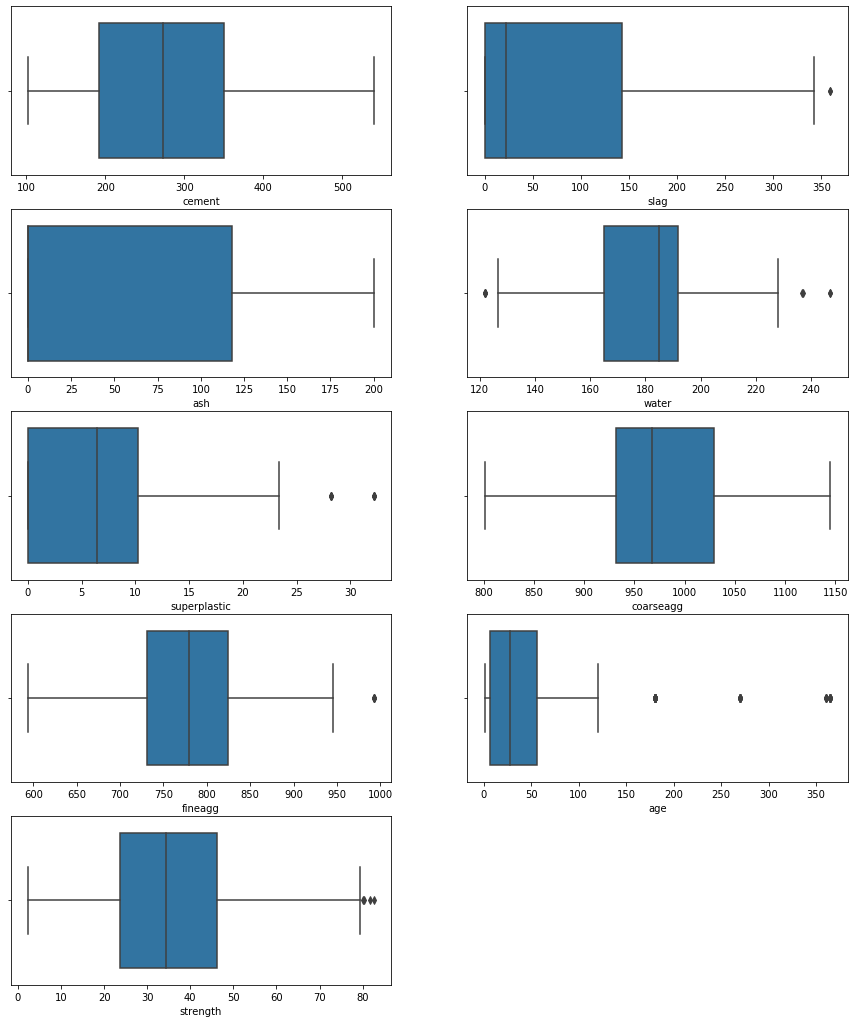

In [13]:
#Checking for the outliers using boxplot
i = 0
List=list(df.iloc[:,0:9].columns.values)
n=len(List)
plt.figure(figsize= (15,18))
while i<n: 
    New_List=List[i]
    plt.subplot(5,2,i+1)
    sns.boxplot(df[New_List])
    i=i+1 
plt.show()

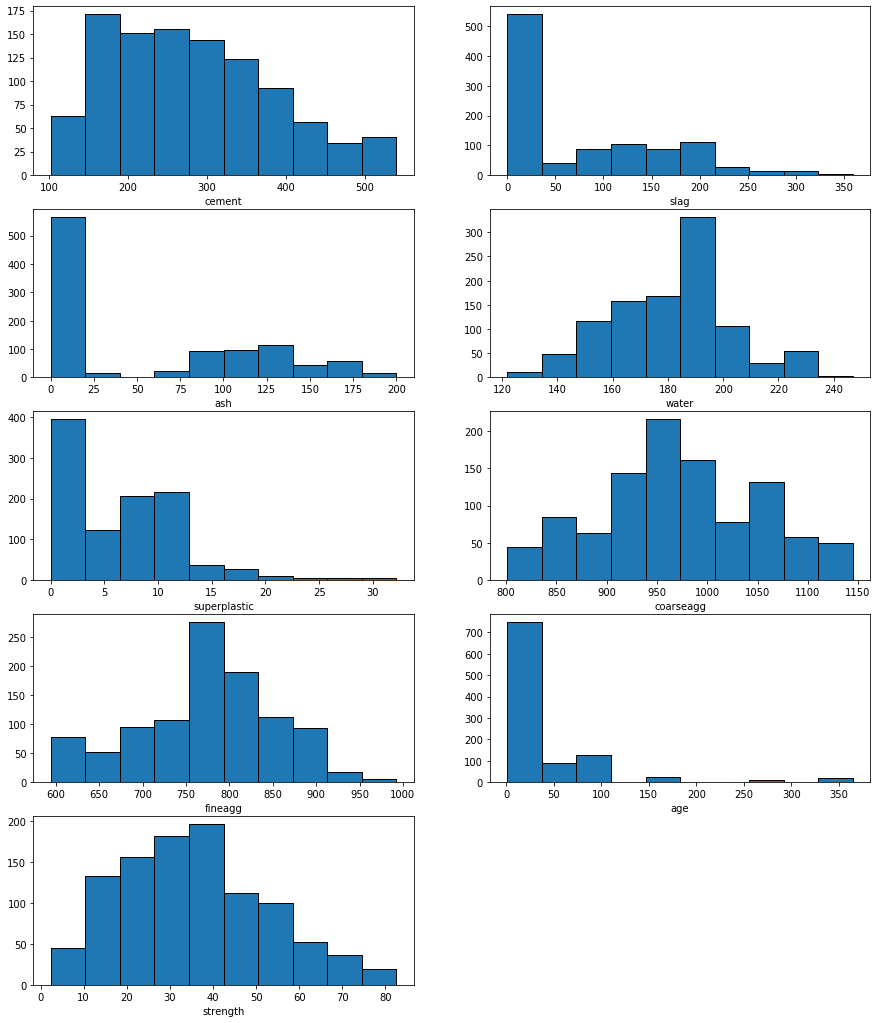

In [14]:
# Histogram Plot of Quantitative Data
i = 0
List=list(df.iloc[:,0:9].columns.values)
n=len(List)
plt.figure(figsize= (15,18))
while i<n: 
    New_List=List[i]
    plt.subplot(5,2,i+1)
    plt.hist(df[New_List],edgecolor = 'black')
    plt.xlabel(New_List)
    i=i+1
plt.show() 

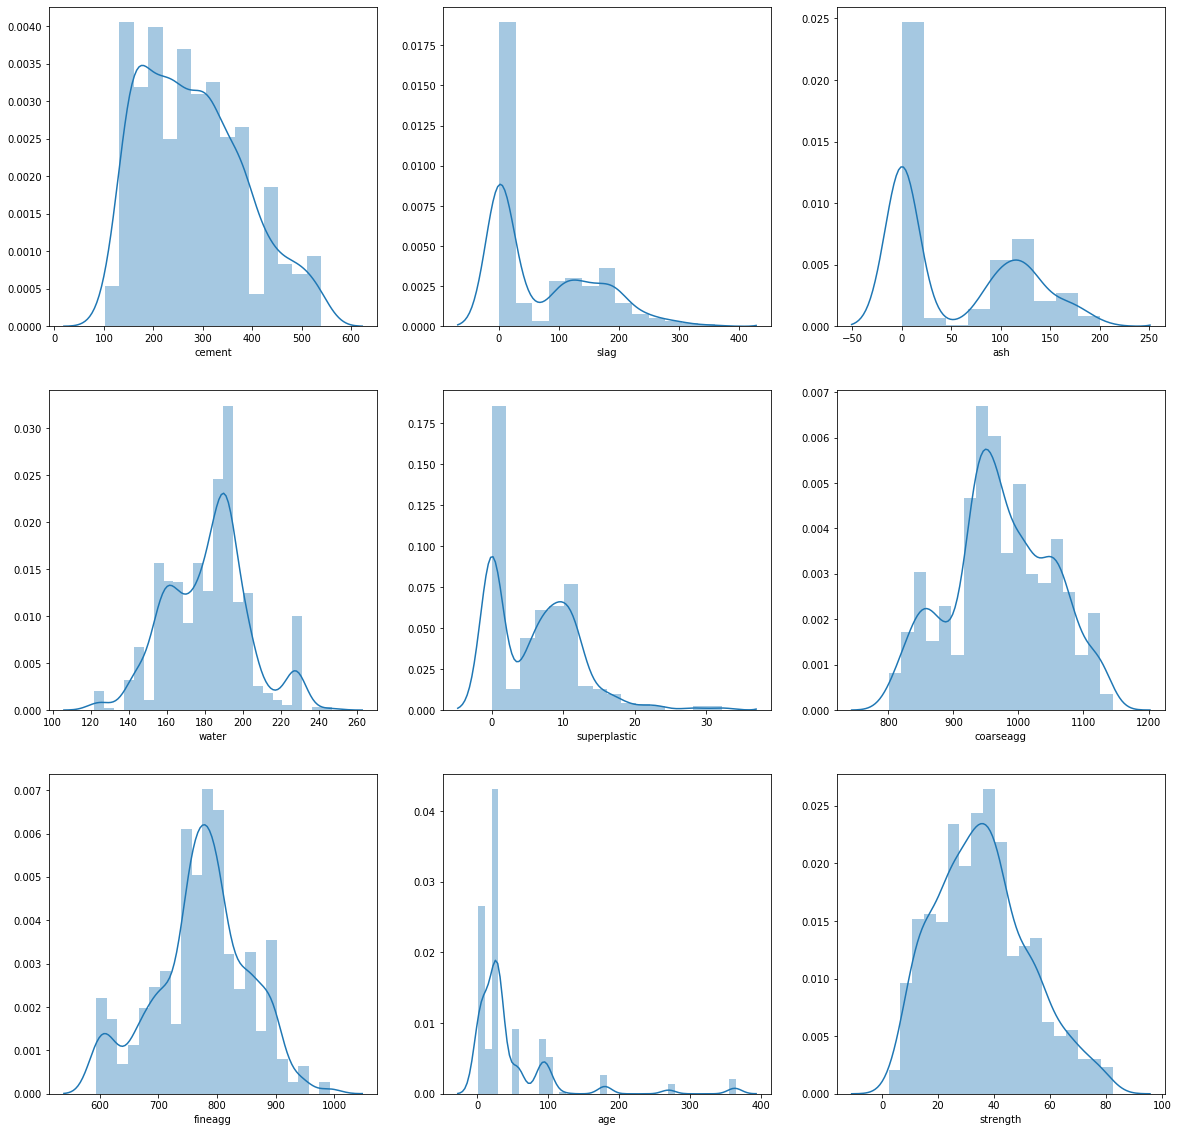

In [15]:
plt.figure(figsize=(20,20))  
pos = 1   
for feature in df.columns:   
    plt.subplot(3, 3, pos)  
    if feature in ['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','strength']:
         sns.distplot(df[feature], kde=True ) 
    pos += 1

# 1b. Multivariate analysis (5 marks) 

i. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes 

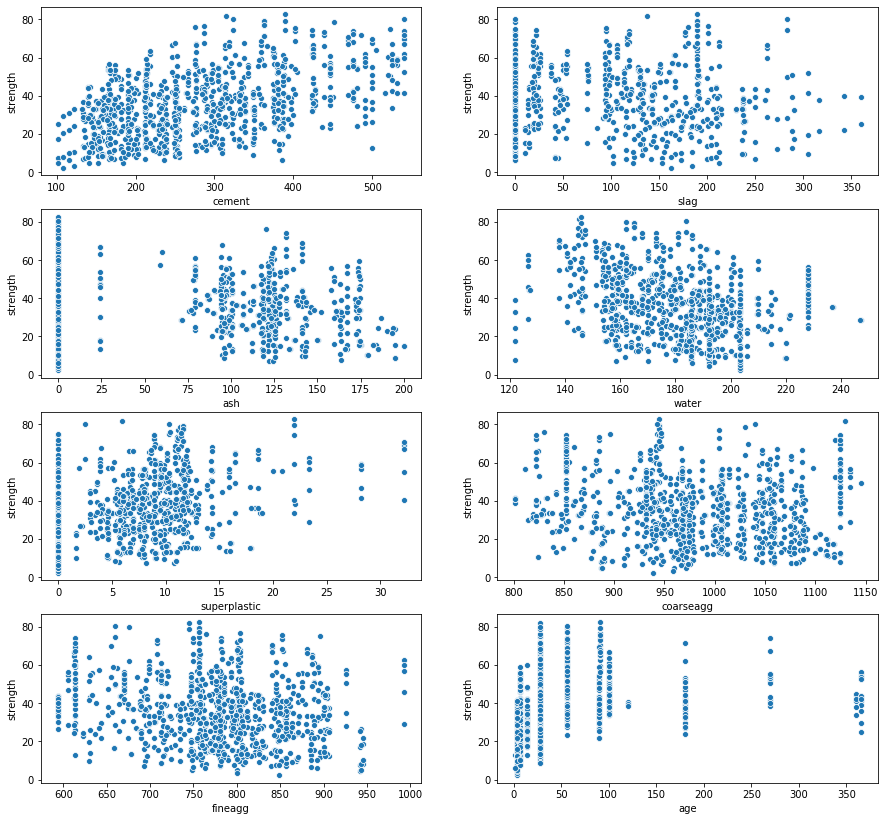

In [16]:
i = 0
List=list(df.iloc[:,0:8].columns.values)
n=len(List)
plt.figure(figsize= (15,18))
while i<n: 
    New_List=List[i]
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=New_List, y="strength", data=df)
    plt.xlabel(New_List)
    i=i+1
plt.show()

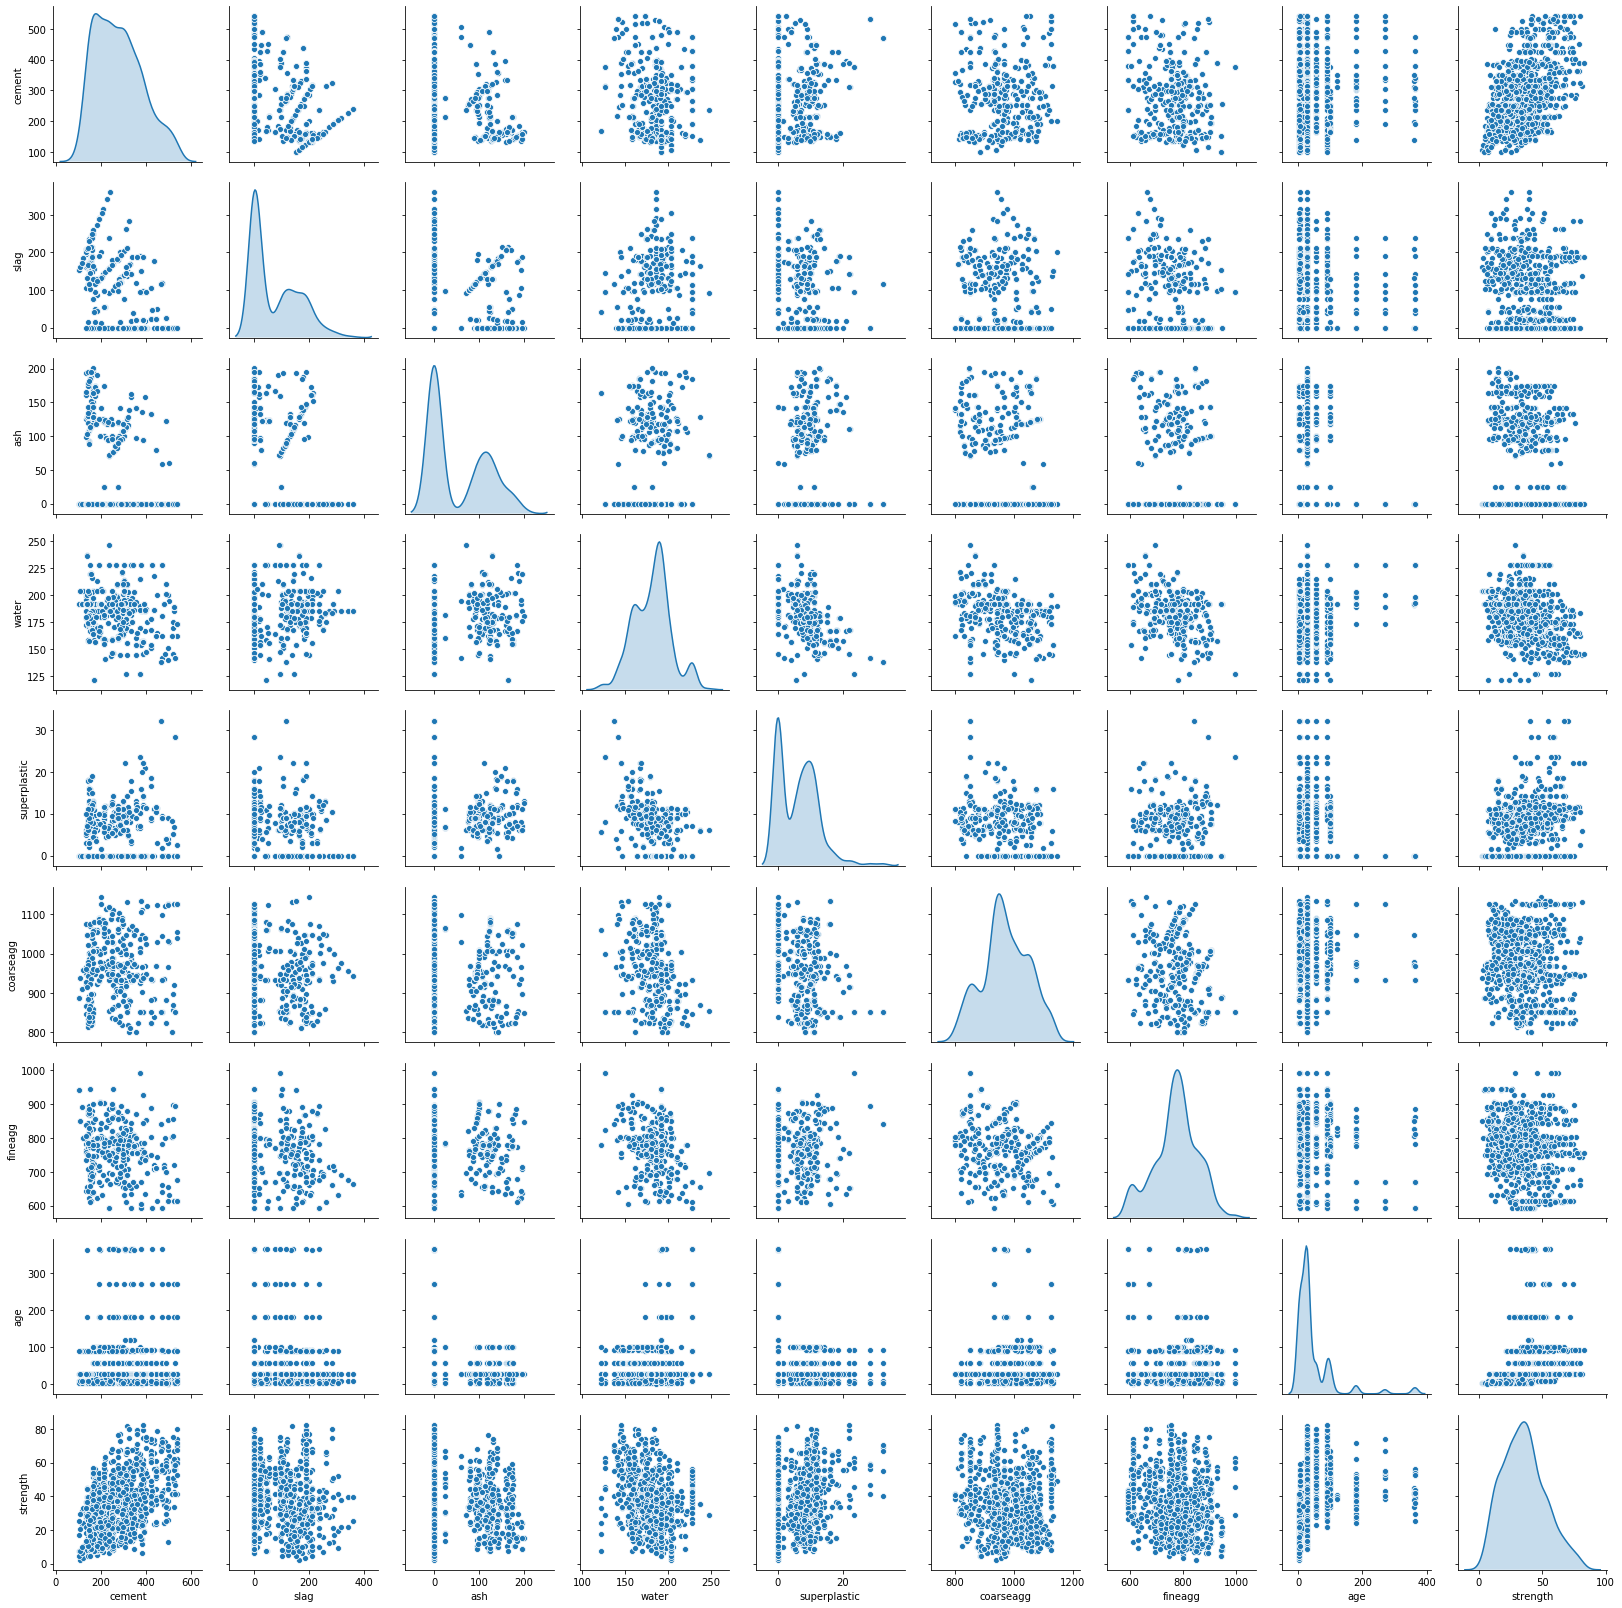

In [17]:
# To generate pair plot, to compare any 2 attributes in data. KDE shows Kernel density in Diagonal axis
sns.pairplot(df,diag_kind='kde')
plt.show()

In [18]:
#We will use Pearson Correlation Coefficient to see what all attributes are linearly related 
df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


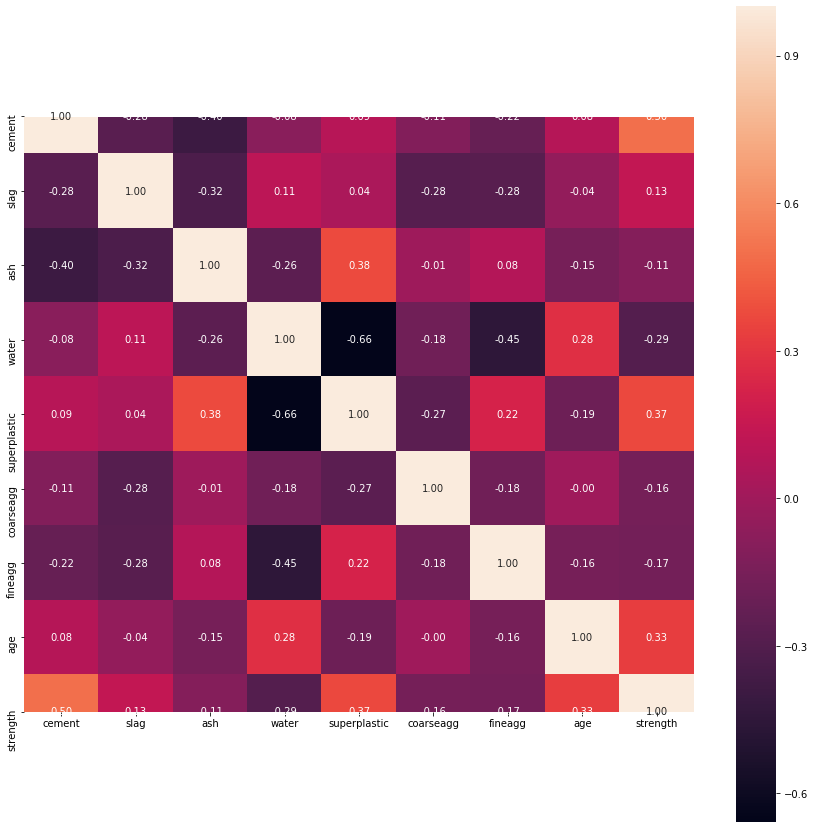

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,square=True,fmt='.2f')
plt.show()

In [20]:
print('Insights from Correlation Heatmap:\n');
a=df.corr()
i = 0
j = 0
c = 0
n=len(a.columns)
col=list(a.columns.values)
ind=list(a.index.values)
while i < n:
    sInd=ind[i]
    while j < n:
        sCol=col[j]
        value=a.loc[sInd,sCol]
        if(sInd!=sCol):
            print('Correlation between',sInd,'&',sCol,'is',a.loc[sInd,sCol])
        j=j+1
    c=c+1
    j = c
    i=i+1 

Insights from Correlation Heatmap:

Correlation between cement & slag is -0.275215911030323
Correlation between cement & ash is -0.39746734080689944
Correlation between cement & water is -0.08158674846410845
Correlation between cement & superplastic is 0.09238617275378021
Correlation between cement & coarseagg is -0.1093489941249012
Correlation between cement & fineagg is -0.22271784866558716
Correlation between cement & age is 0.08194602387182187
Correlation between cement & strength is 0.49783191932415705
Correlation between slag & ash is -0.32357990050638596
Correlation between slag & water is 0.10725202721109303
Correlation between slag & superplastic is 0.04327041876104153
Correlation between slag & coarseagg is -0.28399861195921455
Correlation between slag & fineagg is -0.28160267061419425
Correlation between slag & age is -0.0442460193044543
Correlation between slag & strength is 0.13482926149740573
Correlation between ash & water is -0.2569840228651486
Correlation between ash &

# 1c. Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks) 

Replacing the outliers with mean of the data to address the presence of outliers, and as there are no null values, there is no need to worry about missing value treatments

In [21]:
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_value = Q1 - (1.5 * IQR)
    upper_value = Q3 + (1.5 * IQR)
    
    df.loc[(df[col]< lower_value) | ( df[col] > upper_value), col] = df[col].mean()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null float64
strength        1030 non-null float64
dtypes: float64(9)
memory usage: 72.5 KB


In [23]:
print('Checking the presence of outliers of Quantitative Data in the Dataframe df:\n')
i = 0
total_outliers=0
List=list(df.columns.values)
n=len(List)
while i < n:   
    New_List=List[i]
    minimum,q1,q3,maximum= np.percentile(df[New_List],[0,25,75,100])
    iqr=q3-q1
    lower_value=q1-(1.5 * iqr)
    upper_value=q3+(1.5 * iqr)
    if ((minimum<lower_value) or (maximum>upper_value)):
        outliers = [x for x in df[New_List] if x < lower_value or x > upper_value]
        print('Identified outliers for',New_List,'out of', len(df[New_List]),'records: %d' % len(outliers))       
        total_outliers=total_outliers+len(outliers)
    else:
        print('There is no outlier for the attribute',New_List)        
    i=i+1
print('Total number of outliers are:',total_outliers)

Checking the presence of outliers of Quantitative Data in the Dataframe df:

There is no outlier for the attribute cement
There is no outlier for the attribute slag
There is no outlier for the attribute ash
There is no outlier for the attribute water
There is no outlier for the attribute superplastic
There is no outlier for the attribute coarseagg
Identified outliers for fineagg out of 1030 records: 30
Identified outliers for age out of 1030 records: 3
Identified outliers for strength out of 1030 records: 4
Total number of outliers are: 37


Notice in our attempt to remove outliers, we have introduced new outliers. This is expected to re-shaping distributions
Hence we proceed by ignoring these

# 2. Deliverable -2 (Feature Engineering techniques) (15 marks) 

# 2a. Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks) 

In [24]:
# we wil first scale the data
# then split it into train and test data sets.

from scipy.stats import zscore
df_Scaled=df.apply(zscore)
df_Scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,-0.355018
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,-0.737108
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,-0.395144
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.600806
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,-1.049727


In [25]:
X = df_Scaled.drop(['strength'],axis = 1)
y = df_Scaled[['strength']]

print("shape of independant data: ", X.shape)
print("shape of dependant data: ", y.shape)

shape of independant data:  (1030, 8)
shape of dependant data:  (1030, 1)


In [26]:
seed=1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

print("Shape of X train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)

Shape of X train :  (721, 8)
Shape of X_test  :  (309, 8)


In [28]:
#Checking the split of the data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df)) * 100))

70.00% data is in training set
30.00% data is in test set


In [29]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [30]:
print('Train Data Score :',np.round(regression_model.score(X_train, y_train),4))
print('Test Data Score :',np.round(regression_model.score(X_test, y_test),4))

Train Data Score : 0.7461
Test Data Score : 0.7252


In [31]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.654481765897421
The coefficient for slag is 0.3683983523805976
The coefficient for ash is 0.1598946977231939
The coefficient for water is -0.21327625112707246
The coefficient for superplastic is 0.10541659379360452
The coefficient for coarseagg is -0.019348538145273188
The coefficient for fineagg is -0.025242964666335094
The coefficient for age is 0.5419650554392358


Observation:

    We notice some attributes like superplastic, coarseagg, fineagg has very weak co-efficents.                     
    So, lets try out regularization models like Ridge and lasso and note down their co-efficents

In [32]:
ridge = Ridge(alpha=.5)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.65070493  0.36487088  0.15674481 -0.21523685  0.10565097 -0.02145357
  -0.02801205  0.5415655 ]]


In [33]:
print('Train Data Score :',np.round(ridge.score(X_train, y_train),4))
print('Test Data Score :',np.round(ridge.score(X_test, y_test),4))

Train Data Score : 0.7461
Test Data Score : 0.7253


In [34]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.44663455  0.15901188 -0.         -0.09439643  0.15957815 -0.
 -0.          0.42332584]


In [35]:
print('Train Data Score :',np.round(lasso.score(X_train, y_train),4))
print('Test Data Score :',np.round(lasso.score(X_test, y_test),4))

Train Data Score : 0.6819
Test Data Score : 0.6522


In [36]:
#Comparing model Score
scores = { 
'Regression' : {
    'Train score' : regression_model.score(X_train, y_train),
    'Test score': regression_model.score(X_test, y_test),
     },
'Ridge' : {
    'Train score' : ridge.score(X_train, y_train),
    'Test score': ridge.score(X_test, y_test),
    },
'Lasso' : {
    'Train score' : lasso.score(X_train, y_train),
    'Test score': lasso.score(X_test, y_test),
    }
}
scores_df = pd.DataFrame(scores)

scores_df

,Regression,Ridge,Lasso
Train score,0.746116,0.746114,0.681925
Test score,0.725245,0.725262,0.652178


Insights:            
   
    The model is performing more or less the same for simple linear regressor and for ridge on both the train and test sets.   
    Notice, for lasso, the model score is slighly less as it has acheived the same by using 2 less features.

# 2b. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks) 

In [37]:
#Lets try to increase the model complexity and see if we can increase the model performance.

# lets start with a quadratic ie, degree=2
poly = PolynomialFeatures(degree = 2, interaction_only=True)

X_poly = poly.fit_transform(X)
XP_train, XP_test, yP_train, yP_test = train_test_split(X_poly, y, test_size=0.30, random_state=seed)
XP_train.shape

(721, 37)

In [38]:
regression_model.fit(XP_train, yP_train)
print('Train Data Score :',np.round(regression_model.score(XP_train, yP_train),4))
print('Test Data Score :',np.round(regression_model.score(XP_test, yP_test),4))

Train Data Score : 0.7996
Test Data Score : 0.7734


In [39]:
print(regression_model.coef_[0])

[ 9.78393038e-18  7.10496388e-01  4.73613540e-01  1.63013107e-01
 -2.05673995e-01  1.26783199e-01  2.49962898e-03  2.58788022e-02
  5.44522404e-01  7.97591266e-02  6.10884470e-02 -1.57455994e-01
 -1.65755741e-01  8.42803704e-02  4.86661955e-02  5.94066686e-02
  8.08447624e-02 -6.64381720e-02 -5.86809727e-02  8.85762625e-02
  1.15348955e-01  1.13783206e-01 -2.38787967e-01 -2.58233698e-01
  1.19527016e-02  2.33229526e-02  8.14727385e-02  7.06884483e-02
 -1.37975914e-01 -2.65000348e-02 -2.39922807e-02 -4.53517982e-02
 -1.00353390e-02 -9.13944133e-03  1.10830570e-01 -1.16778985e-03
 -6.54503742e-03]


In [40]:
ridge.fit(XP_train,yP_train)
print('Train Data Score :',np.round(ridge.score(XP_train, yP_train),4))
print('Test Data Score :',np.round(ridge.score(XP_test, yP_test),4))

Train Data Score : 0.7996
Test Data Score : 0.7733


In [41]:
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.          0.7029405   0.4655632   0.15727171 -0.21040441  0.12655601
  -0.0018716   0.0198573   0.54452125  0.07780747  0.06006749 -0.15418861
  -0.15979152  0.0835854   0.04824185  0.05715543  0.07891335 -0.06427487
  -0.05350976  0.08742269  0.11442925  0.1117241  -0.23439193 -0.25311343
   0.01191437  0.02387389  0.0793984   0.07275507 -0.13649227 -0.02582364
  -0.02512294 -0.04249517 -0.00647502 -0.00898529  0.11022617 -0.00210297
  -0.00825156]]


In [42]:
lasso.fit(XP_train,yP_train)
print('Train Data Score :',np.round(lasso.score(XP_train, yP_train),4))
print('Test Data Score :',np.round(lasso.score(XP_test, yP_test),4))

Train Data Score : 0.6833
Test Data Score : 0.6494


In [43]:
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          0.43982948  0.15033704  0.         -0.08963962  0.15275328
 -0.         -0.          0.42104914  0.         -0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
  0.         -0.          0.          0.          0.         -0.03361561
  0.          0.         -0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.        ]


In [44]:
#Comparing model Score
pscores = { 
'pRegression' : {
    'Train score' : regression_model.score(XP_train, yP_train),
    'Test score': regression_model.score(XP_test, yP_test),
     },
'pRidge' : {
    'Train score' : ridge.score(XP_train, yP_train),
    'Test score': ridge.score(XP_test, yP_test),
    },
'pLasso' : {
    'Train score' : lasso.score(XP_train, yP_train),
    'Test score': lasso.score(XP_test, yP_test),
    }
}
pscores_df = pd.DataFrame(pscores)

pscores_df

,pRegression,pRidge,pLasso
Train score,0.799580,0.799569,0.683340
Test score,0.773406,0.773284,0.649419


Insights:              

    We notice perfomance of the model slightly increased when compared to linear model
    So a quadratic model will be of better use for us then a simple linear model

The low score may be due to the large spread and apparent mix of gaussians Let us explore the data for hidden clusters

# 2c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks) 

In [45]:
cluster_range = range(1, 6)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df_Scaled)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,9270.000000
1,2,7568.409562
2,3,6366.023328
3,4,5584.220504
4,5,5101.143869


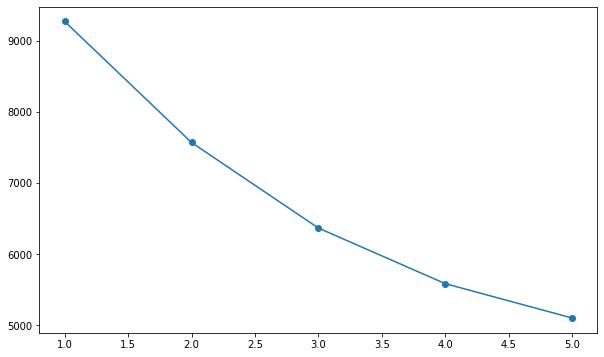

In [46]:
# Elbow plot
plt.figure(figsize=(10,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )
plt.show()

Insights: 
    
    The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters, so lets consider 3 as a 
    good cluster

In [47]:
cluster = KMeans(n_clusters = 3,random_state=seed)
cluster.fit(df_Scaled)

prediction=cluster.predict(df_Scaled)

# Creating a mirror copy for later re-use instead of building repeatedly
df_Scaled_copy = df_Scaled.copy(deep = True)

# Creating a new column "GROUP" which will hold the cluster id of each record
df_Scaled_copy["group"] = prediction     
  
df_Scaled_copy.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,group
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,-0.355018,2
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,-0.737108,0
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,-0.395144,0
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.600806,2
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,-1.049727,2


In [48]:
centroids = cluster.cluster_centers_
centroids

centroid_df = pd.DataFrame(centroids, columns = list(df_Scaled) )
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-0.629332,-0.400276,1.126135,-0.266806,0.490642,0.087756,0.235170,0.062458,-0.242541
1,0.955503,0.506622,-0.407968,-0.891693,0.959384,-0.653712,0.060397,-0.008460,1.118429
2,0.073411,0.099393,-0.809908,0.707039,-0.945569,0.261048,-0.245020,-0.052304,-0.362723


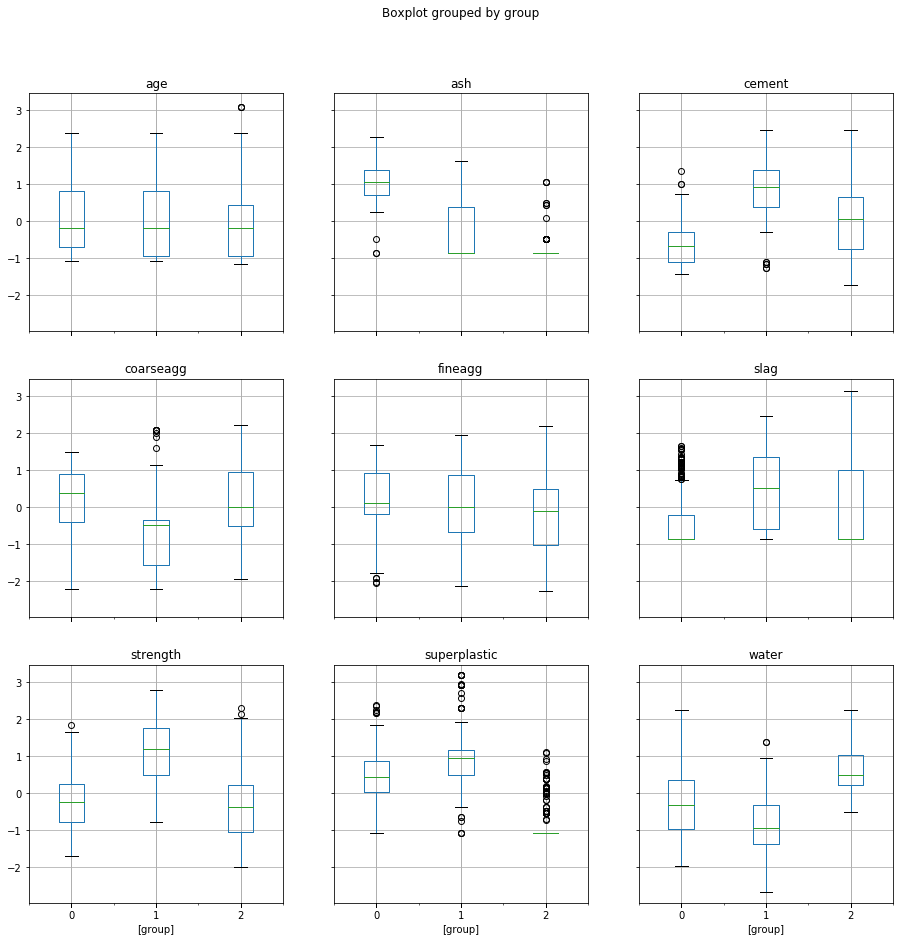

In [49]:
df_Scaled_copy.boxplot(by = 'group',  layout=(3,3), figsize=(15, 15))
plt.show()

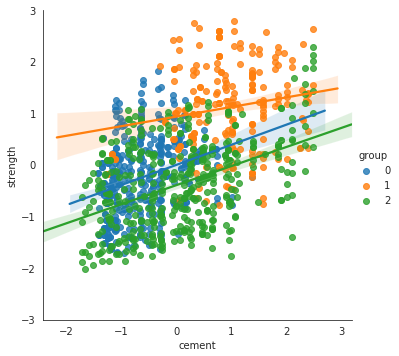

In [50]:
# Let us analyse strength vs each of the other independant column

#cement vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('cement','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))
plt.show()

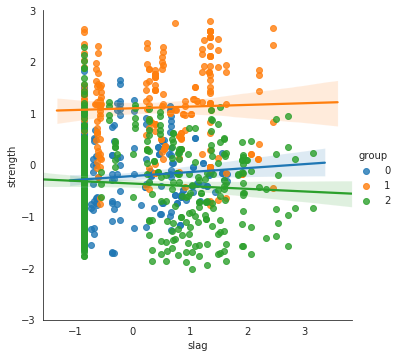

In [51]:
#slag vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('slag','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))
plt.show()

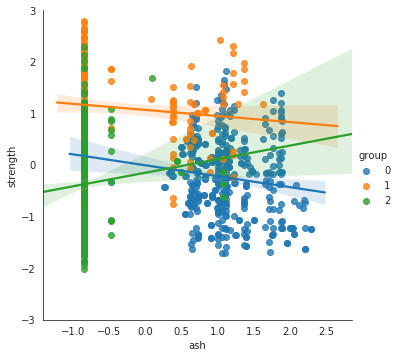

In [52]:
#ash vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('ash','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))
plt.show()

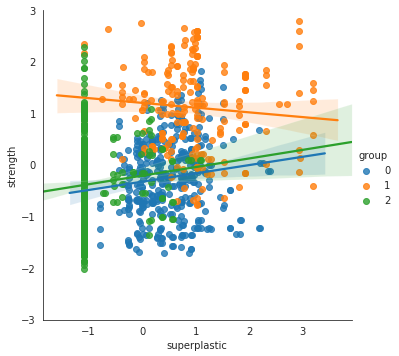

In [53]:
#superplastic vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('superplastic','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))

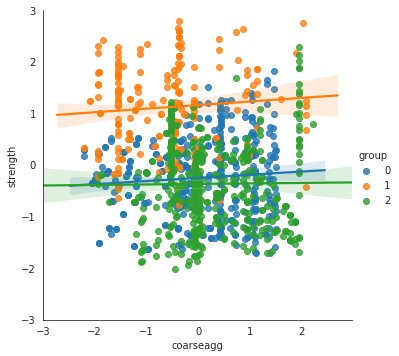

In [54]:
#coarseagg vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('coarseagg','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))
plt.show()

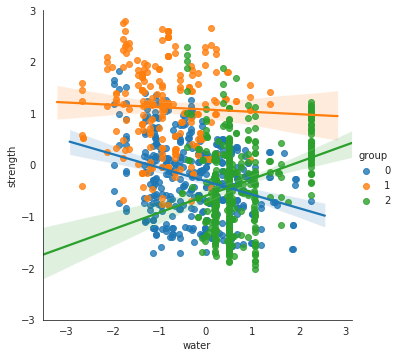

In [55]:
#water vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('water','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))
plt.show()

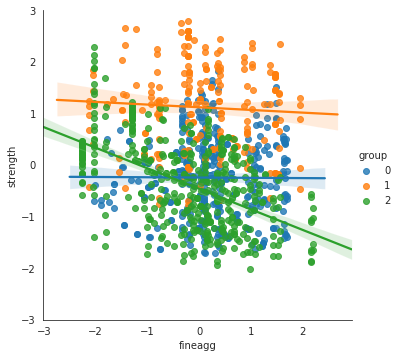

In [56]:
#fineagg vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('fineagg','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))
plt.show()

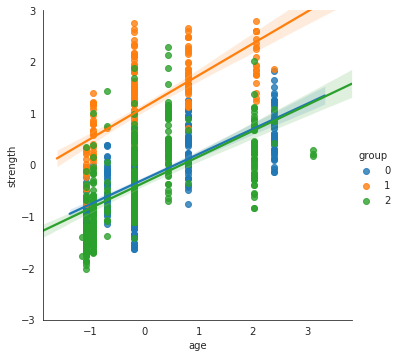

In [57]:
#age vs strength
with sns.axes_style("white"):
    plot = sns.lmplot('age','strength',data=df_Scaled_copy,hue='group')
plot.set(ylim = (-3,3))
plt.show()

Insights:

        We notice from the box plots, the body of box for each group overlaps with other. The same can be seen in individual  plot as well.    
        This means, we are unable to distinguish the clusters clearly. So it is difficult for us to pull out a cluster and build a model on that.
        Hence K-means also does not seem to help our cause.
        
What have we understood so far from the analysis:
1. Kmeans clustering does not help in this case.
2. Attributes like 'ash', 'coarseagg', 'fineagg' are weak contributes so can be dropped.
3. A complex model performs better for the given dataset rather than a linear model
4. The complexity of model can be set as a quadratic. ie degree = 2 polynomial.
5. So we will use a svm regressor with kernel = poly , degree = 2

Before proceeding to drop the features, lets us validate from feature importance using decision trees.

# 3. Deliverable -3 (create the model ) ( 15 marks) - Obtain feature importance for the individual features and present your findings 

# 3a. Decision Tree Regressor

In [58]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train , y_train)

DecisionTreeRegressor()

In [59]:
# Feature Importance

col = df.columns
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([DT_model.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,cement,0.361703
7,age,0.336478
3,water,0.123756
1,slag,0.081693
2,ash,0.031481
5,coarseagg,0.025628
6,fineagg,0.020758
4,superplastic,0.018502


Insights:
    
    We can see that the feature importance is less in the attributes  'ash', 'coarseagg', 'fineagg', this validates our previous assumptions to drop 'ash', 'coarseagg', 'fineagg'

In [60]:
df_Scaled_new = df_Scaled.copy()

X_new = df_Scaled_new.drop(['strength','ash','coarseagg','fineagg'] , axis=1)
y_new = df_Scaled_new['strength']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new, test_size = 0.3, random_state = seed)
print(X_train_new.shape)
print(X_test_new.shape)

(721, 5)
(309, 5)


In [61]:
DT_model_new = DecisionTreeRegressor(random_state=seed)
DT_model_new.fit(X_train_new , y_train_new)

DecisionTreeRegressor(random_state=1)

In [62]:
col_new = X_new.columns
feature_importance=pd.DataFrame(np.hstack((np.array([col_new]).T, np.array([DT_model_new.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,cement,0.377627
4,age,0.338777
2,water,0.143362
1,slag,0.107296
3,superplastic,0.032939


In [63]:
y_predict = DT_model_new.predict(X_test_new)

train_score = DT_model_new.score(X_train_new,y_train_new)
test_score = DT_model_new.score(X_test_new, y_test_new)

print("Decision tree score for train set: ", train_score*100)
print("Decision tree score for test set: ", test_score*100)

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision tree'], 'accuracy':test_score })
resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

Decision tree score for train set:  99.42618320212459
Decision tree score for test set:  85.71280204776572


,Method,accuracy
0,Decision tree,0.857128


Insights:
    
    There is a noticable difference befference between train and test score, this indicates the over fitting of the model, 
    lets try Kfold cross validation before pruning the decision tree

In [64]:
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(DT_model_new,X_new, y_new, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

tempResultsDf = pd.DataFrame({'Method':['DecisionTree k-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.8679013752522267
Standard Deviation:  0.04134587678300908


,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901


In [65]:
# Pruning 
DT_pruned = DecisionTreeRegressor(criterion = "mse", max_depth=5, min_samples_leaf=5,random_state=seed)
DT_pruned.fit(X_train_new, y_train_new)

print("Train score : ", DT_pruned.score(X_train_new,y_train_new))

Train score :  0.7973712507103199


Overfitting has been reduced after Pruning

In [66]:
y_predict_1 = DT_pruned.predict(X_test_new)

print('Pruned decision tree test score:',DT_pruned.score(X_test_new,y_test_new))
accuracy = DT_pruned.score(X_test_new,y_test_new)
tempResultsDf = pd.DataFrame({'Method':['DecisionTree pruned'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Pruned decision tree test score: 0.755221919947056


,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222


In [67]:
feature_importance=pd.DataFrame(np.hstack((np.array([col_new]).T, np.array([DT_pruned.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
0,cement,0.384739
4,age,0.371915
2,water,0.133084
1,slag,0.088641
3,superplastic,0.021621


In [68]:
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(DT_pruned,X_new, y_new, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

tempResultsDf = pd.DataFrame({'Method':['DT pruned K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
#resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf 

Average accuracy:  0.7468946763277372
Standard Deviation:  0.04697884036178428


,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895


# 3b. Random Forest Regressor

In [69]:
X = df_Scaled.drop(['strength'],axis = 1)
y = df_Scaled[['strength']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=seed)

print("Shape of X train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)

Shape of X train :  (721, 8)
Shape of X_test  :  (309, 8)


In [70]:
rf = RandomForestRegressor(n_estimators = 100,random_state=seed)
rf = rf.fit(X_train, y_train.values.ravel())

pred_RF = rf.predict(X_test)
acc_RF = rf.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': acc_RF})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487


Feature Importance:

In [71]:
col = df.columns
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([rf.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,age,0.350722
0,cement,0.317500
3,water,0.126018
1,slag,0.068501
4,superplastic,0.047748
6,fineagg,0.038271
5,coarseagg,0.027132
2,ash,0.024107


Insights:
    
      Except age and cement attributes, remaining attributes are weak features

In [72]:
# K-Fold cross validation for random forest model
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(rf,X, y.values.ravel(), cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

tempResultsDf = pd.DataFrame({'Method':['Random forest K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.9186910327938268
Standard Deviation:  0.024890900396238293


,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691


# 3c. Ada Boosting Regressor

In [73]:
ab = AdaBoostRegressor( n_estimators= 500, learning_rate=0.1, random_state=seed)
ab = ab.fit(X_train, y_train.values.ravel())

acc_AB = ab.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['AdaBoosting regressor'], 'accuracy': acc_AB})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614


In [74]:
#Feature importance
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([ab.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,age,0.316076
0,cement,0.307473
3,water,0.182992
1,slag,0.069920
6,fineagg,0.045028
4,superplastic,0.043837
5,coarseagg,0.020429
2,ash,0.014245


Insights:
    
      Except age, water and cement attributes, remaining attributes are weak features

In [75]:
#K-Fold cross validation on above model
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(ab,X, y.values.ravel(), cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['Ada Boosting K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.77708456557645
Standard Deviation:  0.03291457583555707


,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614
0,Ada Boosting K-fold,0.777085


# 3d. Bagging Regressor

In [76]:
bg = BaggingRegressor(n_estimators=500, max_samples= .7, bootstrap=True, oob_score=True, random_state=seed)
bg = bg.fit(X_train, y_train.values.ravel())

acc_bag = bg.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Bagging regressor'], 'accuracy': acc_bag})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614
0,Ada Boosting K-fold,0.777085
0,Bagging regressor,0.899409


In [77]:
#K-Fold Cross validation
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(bg,X, y.values.ravel(), cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())


tempResultsDf = pd.DataFrame({'Method':['Bagging K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.9128485977960941
Standard Deviation:  0.02306771194553079


,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614
0,Ada Boosting K-fold,0.777085
0,Bagging regressor,0.899409
0,Bagging K-fold,0.912849


# 3e. Gradient Boosting Regressor

In [78]:
gb = GradientBoostingRegressor(n_estimators = 500, learning_rate = 0.1, random_state=seed)
gb = gb.fit(X_train, y_train.values.ravel())

acc_grad = gb.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Gradient boosting regressor'], 'accuracy': acc_grad})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614
0,Ada Boosting K-fold,0.777085
0,Bagging regressor,0.899409
0,Bagging K-fold,0.912849


In [79]:
#Feature importance
feature_importance=pd.DataFrame(np.hstack((np.array([col[0:-1]]).T, np.array([gb.feature_importances_]).T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,age,0.366487
0,cement,0.307272
3,water,0.122664
1,slag,0.071516
4,superplastic,0.061433
6,fineagg,0.038181
5,coarseagg,0.016522
2,ash,0.015925


Insights:
    
      Except age, water and cement attributes, remaining attributes are weak features

In [80]:
num_folds = 10
kfold = KFold(n_splits=num_folds, random_state=None)
results1 = cross_val_score(gb,X, y.values.ravel(), cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

tempResultsDf = pd.DataFrame({'Method':['Gradient boosting K-fold'], 'accuracy': [accuracy]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Average accuracy:  0.9362434795690568
Standard Deviation:  0.018716183469910497


,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614
0,Ada Boosting K-fold,0.777085
0,Bagging regressor,0.899409
0,Bagging K-fold,0.912849


# 3f. Support vector Regressor

In [81]:
svr = SVR(kernel='poly', degree = 2,gamma='auto')
svr.fit(X_train, y_train.values.ravel())

acc_svr = svr.score(X_test,y_test)

tempResultsDf = pd.DataFrame({'Method':['Support Vector Regressor'], 'accuracy': acc_grad})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614
0,Ada Boosting K-fold,0.777085
0,Bagging regressor,0.899409
0,Bagging K-fold,0.912849


Insights:
    
    We can see that the model 'Random Forest regressor', 'Gradient Boosting regressor' and 'Support vector regressor' 
    performs better than other regressor model

# 4. Deliverable -4 (Tuning the model) (20 marks) 

# 4a. Algorithms that you think will be suitable for this project (5 marks) 

In [82]:
resultsDf

,Method,accuracy
0,Decision tree,0.857128
0,DecisionTree k-fold,0.867901
0,DecisionTree pruned,0.755222
0,DT pruned K-fold,0.746895
0,Random Forest,0.901487
0,Random forest K-fold,0.918691
0,AdaBoosting regressor,0.766614
0,Ada Boosting K-fold,0.777085
0,Bagging regressor,0.899409
0,Bagging K-fold,0.912849


As per the above Model Accuracy Results, we can see that the Random Forest Regressor,  Gradient Boosting Regressor and Suppport vector Regressor has the highest model accuracy when compare too other models, hence we will continue to use these algorithms for further model tuning

SVR Model is already tuned for the best param ie. kernel =poly and degree=2, Hence We will not further tune this model

# 4b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks) 

1. Random Forest Regressor

In [83]:
#Random Search CV
RF = RandomForestRegressor(n_estimators = 100,random_state=seed)
RF.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=1)

In [84]:
param_dict = {"max_depth": [3,4,5,6,7,8,9,10,None],
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

In [85]:
# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(RF, param_distributions=param_dict, n_iter=samples) #default cv = 3

In [86]:
randomCV.fit(X_train, y_train.values.ravel())
print(randomCV.best_params_)

{'bootstrap': True, 'criterion': 'mse', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 7}


In [87]:
RF = RandomForestRegressor(n_estimators = 100,bootstrap=True,criterion='mae',max_depth=9,min_samples_leaf=2,min_samples_split=6,random_state=seed)
RF.fit(X_train, y_train.values.ravel())

pred_RF = RF.predict(X_test)
model_score = RF.score(X_test,y_test)

resultsDf = pd.DataFrame({'Method':['Random Forest-Random Search CV'], 'accuracy':model_score})
resultsDf = resultsDf[['Method', 'accuracy']]

resultsDf

,Method,accuracy
0,Random Forest-Random Search CV,0.883065


In [88]:
#Grid search CV
RF = RandomForestRegressor(n_estimators = 100,random_state=seed)
RF.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=1)

In [89]:
param_dict2 = {"min_samples_split":[2, 4, 6] ,
              "min_samples_leaf": [2, 4, 6],
              "bootstrap": [True, False],
              "criterion": ["mse", "mae"]}

In [90]:
model = GridSearchCV(RF, param_grid=param_dict2, verbose=1)
model.fit(X_train, y_train.values.ravel())
print("Best Hyper Parameters:\n", model.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Hyper Parameters:
 {'bootstrap': True, 'criterion': 'mse', 'min_samples_leaf': 2, 'min_samples_split': 2}


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  1.7min finished


Insights:
    
    Best hyperparam found using the Grid search CV for the Random Forest Regressor is {'bootstrap': True, 
    'criterion': 'mse', 'min_samples_leaf': 2, 'min_samples_split': 2}

In [91]:
RF = RandomForestRegressor(n_estimators = 100,bootstrap=True,criterion='mse',min_samples_leaf=2,min_samples_split=2,random_state=seed)
RF.fit(X_train, y_train.values.ravel())

pred_RF = RF.predict(X_test)
model_score = RF.score(X_test,y_test)

new_resultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy':model_score})
new_resultsDf = new_resultsDf[['Method', 'accuracy']]

new_resultsDf

,Method,accuracy
0,Random Forest,0.896709


In [92]:
num_folds = 50
RF = RandomForestRegressor(n_estimators = 100,bootstrap=True,criterion='mse',min_samples_leaf=2,min_samples_split=2)

kfold = KFold(n_splits=num_folds,random_state=None)
results_RF = cross_val_score(RF, X, y.values.ravel(), cv=kfold)
print(results_RF)
print("Accuracy: %.3f%% (%.3f%%)" % (results_RF.mean()*100.0, results_RF.std()*100.0))

new_CVScores_Df = pd.DataFrame({'Method':['Random Forest'], 'accuracy':results_RF.mean()*100.0, 'std(+/-)':results_RF.std()*100.0})
new_CVScores_Df = new_CVScores_Df[['Method', 'accuracy', 'std(+/-)']]
new_CVScores_Df

[0.76248385 0.90829484 0.71031125 0.78925099 0.94369393 0.76027786
 0.9027833  0.92519044 0.95633564 0.80322704 0.92673964 0.97382025
 0.95075554 0.9459799  0.93865484 0.81062219 0.87317967 0.97026786
 0.90541058 0.9506362  0.93086001 0.85772135 0.96053045 0.71824921
 0.88782309 0.94108121 0.92718812 0.93177217 0.95599748 0.87863336
 0.88383127 0.9488771  0.93188591 0.95489974 0.84146646 0.93584543
 0.90301314 0.86231625 0.88786287 0.89051098 0.90948356 0.88033582
 0.96427075 0.94257191 0.90335641 0.89840383 0.94727952 0.97280196
 0.88978899 0.92381458]
Accuracy: 89.941% (6.399%)


,Method,accuracy,std(+/-)
0,Random Forest,89.940778,6.398783


2. Gradient Boosting Regressor

In [93]:
#Grid search CV Gradient Boosting Regressor
est = [10,150,200,500,1000]
leaf_size = range(1,4)
criterion = ['mse', 'friedman_mse']
split_size = [2, 3, 4]

params = dict(n_estimators=est,min_samples_leaf=leaf_size,min_samples_split=split_size, criterion=criterion)
model = GridSearchCV(GradientBoostingRegressor(), param_grid=params, verbose=1)
model.fit(X_train, y_train.values.ravel())
print("Best Hyper Parameters:\n", model.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  1.9min finished


Best Hyper Parameters:
 {'criterion': 'friedman_mse', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}


Insights:
    
    Best hyperparam found using the Grid search CV for the Gradiennt Boosting Regressor is {'criterion': 'friedman_mse',
    'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}

In [94]:
gb = GradientBoostingRegressor(criterion= 'mse',min_samples_leaf=1,min_samples_split=4,n_estimators=1000,random_state=seed)
gb.fit(X_train,y_train.values.ravel())
print(gb.score(X_train,y_train))

acc_grad = gb.score(X_test,y_test)

tempResultsDf2 = pd.DataFrame({'Method':['Gradient boosting regressor'], 'accuracy': acc_grad})
new_resultsDf = pd.concat([new_resultsDf, tempResultsDf2])
new_resultsDf = new_resultsDf[['Method', 'accuracy']]
new_resultsDf

0.9905717295543571


,Method,accuracy
0,Random Forest,0.896709
0,Gradient boosting regressor,0.925015


In [95]:
num_folds = 50

kfold = KFold(n_splits=num_folds, random_state=None)
results_GBR = cross_val_score(gb, X, y.values.ravel(), cv=kfold)
print(results_GBR)
print("Accuracy: %.3f%% (%.3f%%)" % (results_GBR.mean()*100.0, results_GBR.std()*100.0))

tempCVScores_Df2 = pd.DataFrame({'Method':['Gadient Boosting'], 'accuracy':results_GBR.mean()*100.0, 'std(+/-)':results_GBR.std()*100.0})
new_CVScores_Df = pd.concat([new_CVScores_Df, tempCVScores_Df2])
new_CVScores_Df = new_CVScores_Df[['Method', 'accuracy', 'std(+/-)']]
new_CVScores_Df

[0.8573536  0.97599254 0.89173891 0.95002987 0.87309202 0.89942173
 0.97543328 0.88880977 0.97310157 0.88737846 0.98005568 0.95779041
 0.97515918 0.93623953 0.95193468 0.79884815 0.94927723 0.9855193
 0.94194456 0.98100957 0.97014984 0.87741703 0.98368827 0.80748094
 0.89234057 0.96340654 0.94108336 0.92569778 0.9783841  0.95215701
 0.91203551 0.97315764 0.90682068 0.97614009 0.95545794 0.96399121
 0.96480654 0.94852844 0.91338983 0.9180747  0.9652912  0.95911549
 0.98583699 0.97805965 0.93008809 0.93438529 0.93735937 0.94027642
 0.97165779 0.96577542]
Accuracy: 93.844% (4.328%)


,Method,accuracy,std(+/-)
0,Random Forest,89.940778,6.398783
0,Gadient Boosting,93.844368,4.328032


# 4c. Model performance range at 95% confidence level (10 marks) 

1. Random Forest Regressor (Model performance range at 95% confidence level)

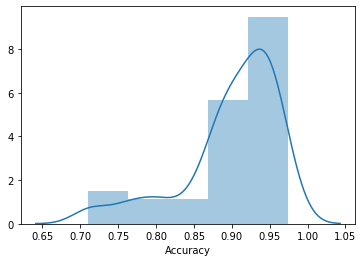

95.0 confidence interval 72.8% and 97.2%


In [96]:
sns.distplot(results_RF,kde=True,bins=5)
plt.xlabel("Accuracy")
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 

p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(results_RF, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results_RF, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

2. Gradient Boosting Regressor (Model performance range at 95% confidence level)

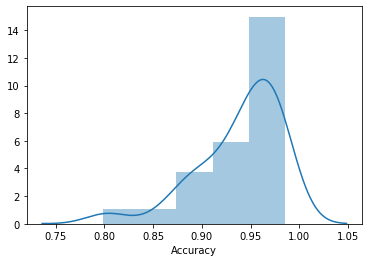

95.0 confidence interval 81.9% and 98.5%


In [97]:
sns.distplot(results_GBR,kde=True,bins=5)
plt.xlabel("Accuracy")
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 

p = ((1.0-alpha)/2.0) * 100              
lower = max(0.0, np.percentile(results_GBR, p))  

p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results_GBR, p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

3. Model Comparison 

In [98]:
#Model accuracy score
new_resultsDf

,Method,accuracy
0,Random Forest,0.896709
0,Gradient boosting regressor,0.925015


In [99]:
#Cross Validation Score
new_CVScores_Df

,Method,accuracy,std(+/-)
0,Random Forest,89.940778,6.398783
0,Gadient Boosting,93.844368,4.328032


Conclusion: 

    From the above results, we can see that the Gradient boosting regressor model has the higher model accuracy of 92.5% 
    and has the cross validation score of 93.8% and the model has 95% Confidence interval of 81.9% and 98.5%